# Task 2

This is the second task for the 'Practical Course Data Science' (M.Inf.1800). In this task you will tackle your first real data science problem with sort of big data: given a list of taxi rides, the goal is to predict the price of each taxi ride.

In [1]:
# Manage imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read data in memory
data = pd.read_csv("train.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11135470 entries, 0 to 11135469
Data columns (total 19 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID               int64
store_and_fwd_flag       object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: float64(12), int64(4), object(3)
memory usage: 1.6+ GB


In [4]:
data.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,1.113547e+07,1.113547e+07,1.113547e+07,1.113547e+07,1.113547e+07,1.113547e+07,1.113547e+07,1.113547e+07,1.113547e+07,1.113547e+07,1.113547e+07,1.113547e+07,1.113547e+07,1.113547e+07,1.113547e+07,1.113547e+07
mean,1.529817e+00,1.657273e+00,3.044006e+00,-7.305081e+01,4.024282e+01,1.043880e+00,-7.312388e+01,4.028391e+01,1.349718e+00,1.350708e+01,3.407188e-01,4.973046e-01,1.842121e+00,3.402089e-01,2.996818e-01,1.683016e+01
std,4.991102e-01,1.302489e+00,2.183019e+01,8.208047e+00,4.521673e+00,5.660610e-01,7.880313e+00,4.341196e+00,4.944984e-01,2.755358e+02,5.339716e-01,4.451916e-02,2.713585e+00,1.719710e+00,1.358086e-02,2.758608e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,-1.181863e+02,0.000000e+00,1.000000e+00,-1.181863e+02,0.000000e+00,1.000000e+00,-4.500000e+02,-4.123000e+01,-2.700000e+00,-6.770000e+01,-1.250000e+01,-3.000000e-01,-4.508000e+02
25%,1.000000e+00,1.000000e+00,1.000000e+00,-7.399178e+01,4.073653e+01,1.000000e+00,-7.399123e+01,4.073492e+01,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.800000e+00
50%,2.000000e+00,1.000000e+00,1.710000e+00,-7.398135e+01,4.075358e+01,1.000000e+00,-7.397935e+01,4.075412e+01,1.000000e+00,1.000000e+01,0.000000e+00,5.000000e-01,1.350000e+00,0.000000e+00,3.000000e-01,1.230000e+01
75%,2.000000e+00,2.000000e+00,3.230000e+00,-7.396617e+01,4.076831e+01,1.000000e+00,-7.396202e+01,4.076954e+01,2.000000e+00,1.550000e+01,5.000000e-01,5.000000e-01,2.460000e+00,0.000000e+00,3.000000e-01,1.836000e+01
max,2.000000e+00,9.000000e+00,7.173270e+04,0.000000e+00,6.409648e+01,9.900000e+01,1.062469e+02,6.004071e+01,5.000000e+00,6.285447e+05,5.979200e+02,6.035000e+01,8.548500e+02,9.700000e+02,1.164000e+01,6.290338e+05


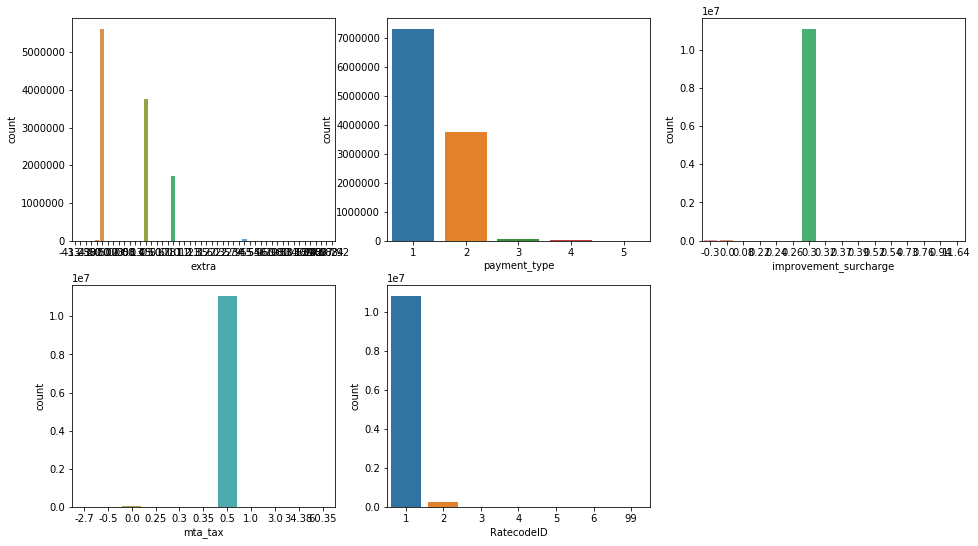

In [5]:
plt.figure(figsize=(16,9))
plt.subplot(2,3,1)
sns.countplot(data.extra)
plt.subplot(2,3,2)
sns.countplot(data.payment_type)
plt.subplot(2,3,3)
sns.countplot(data.improvement_surcharge)
plt.subplot(2,3,4)
sns.countplot(data.mta_tax)
plt.subplot(2,3,5)
sns.countplot(data.RatecodeID)

## Clean Data

In [7]:
df = data.drop(
    data[data.extra.isin([0,0.5,1,4.5]) == False].index
)

In [8]:
df = df.drop(df[df.improvement_surcharge!=0.3].index)
df = df.drop(df[df.RatecodeID.isin([1,2,3,4,5,6]) == False].index)
df = df.drop(df[df.mta_tax.isin([0,0.5]) == False].index)

In [9]:
df = df.drop(df[df.tip_amount < 0].index)
df = df.drop(df[df.fare_amount < 0].index)
df = df.drop(df[df.total_amount < 0].index)
df = df.drop(df[df.mta_tax < 0].index)
df = df.drop(df[df.tolls_amount < 0].index)
df = df.drop(df[df.trip_distance < 0].index)

In [10]:
#keep only the ones that are within +5 to -5 standard deviations in the column 'Data'.
feats = ['tip_amount','total_amount','fare_amount','trip_distance']
for feat in feats:
    df = df[np.abs(df[feat]-df[feat].mean())<=5*df[feat].std()] 

In [11]:
df['total'] = df.extra+df.tip_amount+df.tolls_amount+df.improvement_surcharge+df.mta_tax+df.fare_amount

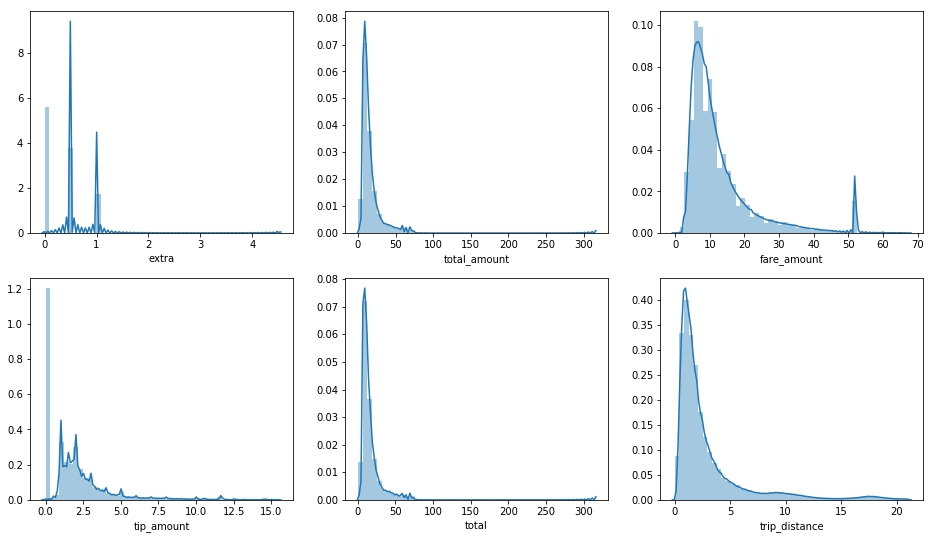

In [12]:
plt.figure(figsize=(16,9))
plt.subplot(2,3,1)
sns.distplot(df.extra)
plt.subplot(2,3,2)
sns.distplot(df.total_amount)
plt.subplot(2,3,3)
sns.distplot(df.fare_amount)
plt.subplot(2,3,4)
sns.distplot(df.tip_amount)
plt.subplot(2,3,5)
sns.distplot(df.total)
plt.subplot(2,3,6)
sns.distplot(df.trip_distance)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11051087 entries, 0 to 11135469
Data columns (total 20 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID               int64
store_and_fwd_flag       object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
total                    float64
dtypes: float64(13), int64(4), object(3)
memory usage: 1.7+ GB


In [14]:
df = df.drop(df[df.total != df.total_amount].index)

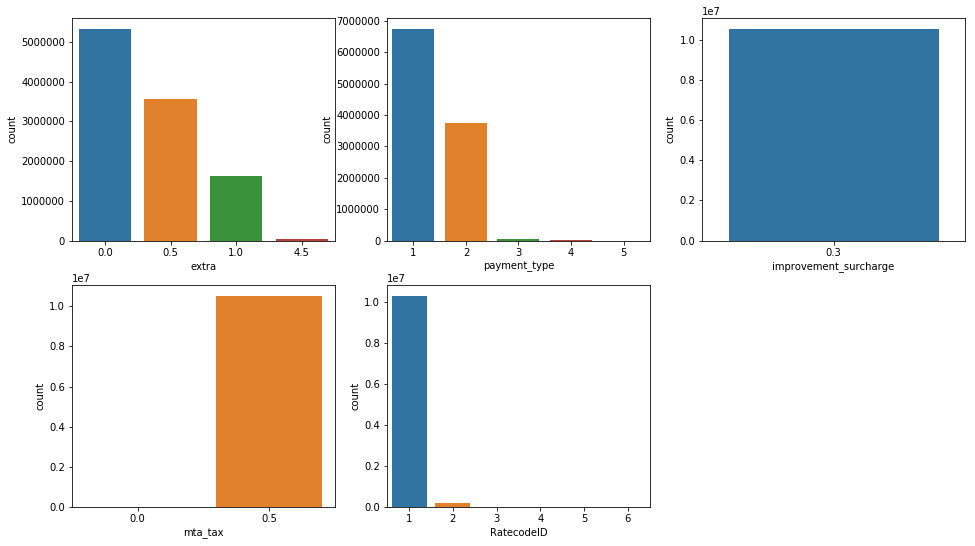

In [15]:
plt.figure(figsize=(16,9))
plt.subplot(2,3,1)
sns.countplot(df.extra)
plt.subplot(2,3,2)
sns.countplot(df.payment_type)
plt.subplot(2,3,3)
sns.countplot(df.improvement_surcharge)
plt.subplot(2,3,4)
sns.countplot(df.mta_tax)
plt.subplot(2,3,5)
sns.countplot(df.RatecodeID)

In [16]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,total
0,2,2016-06-09 21:06:36,2016-06-09 21:13:08,2,0.79,-73.983360,40.760937,1,N,-73.977463,40.753979,2,6.0,0.5,0.5,0.00,0.0,0.3,7.30,7.30
1,2,2016-06-09 21:06:36,2016-06-09 21:35:11,1,5.22,-73.981720,40.736668,1,N,-73.981636,40.670242,1,22.0,0.5,0.5,4.00,0.0,0.3,27.30,27.30
2,2,2016-06-09 21:06:36,2016-06-09 21:13:10,1,1.26,-73.994316,40.751072,1,N,-74.004234,40.742168,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36,9.36
3,2,2016-06-09 21:06:36,2016-06-09 21:36:10,1,7.39,-73.982361,40.773891,1,N,-73.929466,40.851540,1,26.0,0.5,0.5,1.00,0.0,0.3,28.30,28.30
5,2,2016-06-09 21:06:36,2016-06-09 21:19:21,1,2.17,-73.995201,40.739491,1,N,-73.993202,40.762642,1,10.5,0.5,0.5,2.36,0.0,0.3,14.16,14.16


In [17]:
# Get duration
df['duration'] = pd.to_datetime(df["tpep_dropoff_datetime"])-pd.to_datetime(df["tpep_pickup_datetime"])

In [18]:
df['duration'].describe()

count                  10541746
mean     0 days 00:13:40.022080
std      3 days 12:42:42.287636
min        -7305 days +00:53:30
25%             0 days 00:06:50
50%             0 days 00:11:29
75%             0 days 00:18:49
max             2 days 15:00:20
Name: duration, dtype: object

In [19]:
#drop all negative and too short rides  (<= 1 min)
df = df.drop(df[df.duration <= pd.Timedelta("1 min")].index)

# drop all big outliers (5* std)
df = df[np.abs(df.duration-df.duration.mean())<=(10*df.duration.std())] 

In [20]:
df.duration.describe()

count                  10444609
mean     0 days 00:14:41.904194
std      0 days 00:11:46.117508
min             0 days 00:01:01
25%             0 days 00:06:56
50%             0 days 00:11:33
75%             0 days 00:18:51
max             0 days 09:18:15
Name: duration, dtype: object

In [57]:
# Get Holidays
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
cal = calendar()
dr = pd.date_range(start=df['tpep_pickup_datetime'].min(), end=df['tpep_pickup_datetime'].max())
holidays = cal.holidays(start=dr.min(), end=dr.max())
df['Holiday'] = df['tpep_pickup_datetime'].isin(holidays)

Timestamp('2016-06-01 00:00:00', freq='D')

In [68]:
df['Weekday'] = (pd.to_datetime(df['tpep_pickup_datetime']).dt.weekday < 5)

In [74]:
df['Weekday'].value_counts()

True     7703796
False    2740813
Name: Weekday, dtype: int64

In [129]:
df['Overnight'] = np.logical_or( \
    pd.to_datetime(df['tpep_dropoff_datetime']).dt.hour >= 20, \
    pd.to_datetime(df['tpep_dropoff_datetime']).dt.hour <=5)

In [133]:
df['RushHour'] = np.logical_and( \
    np.logical_and( \
       pd.to_datetime(df['tpep_dropoff_datetime']).dt.hour >= 16, \
       pd.to_datetime(df['tpep_pickup_datetime']).dt.hour <=20), \
   np.logical_and( \
      df['Weekday'] == True,\
      df['Holiday'] == False))

In [130]:
df[df.RatecodeID == 1]['Overnight'].value_counts()

False    6612877
True     3616856
Name: Overnight, dtype: int64

In [134]:
df[df.RatecodeID == 1]['RushHour'].value_counts()

False    8105916
True     2123817
Name: RushHour, dtype: int64

In [135]:
df['extra'].value_counts()

0.0    5276372
0.5    3526122
1.0    1604994
4.5      37121
Name: extra, dtype: int64

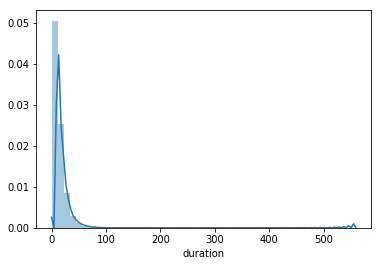

In [64]:
sns.distplot(df.duration.astype('timedelta64[m]'))

In [22]:
df["duration_m"] = df.duration.astype('timedelta64[m]')

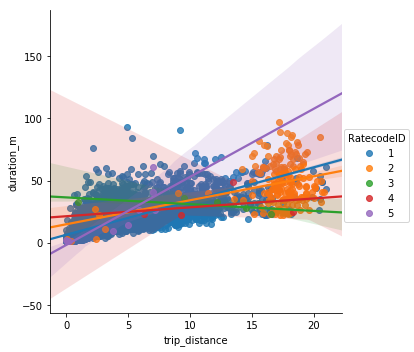

In [38]:
sns.lmplot(x="trip_distance", y="duration_m",hue="RatecodeID", data=df.sample(10000))

In [24]:
df.RatecodeID.value_counts()

1    10229733
2      197328
5        8172
3        6583
4        2762
6          31
Name: RatecodeID, dtype: int64

In [25]:
test = pd.read_csv("test.csv")

In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 15 columns):
ID                       64000 non-null int64
VendorID                 64000 non-null int64
tpep_pickup_datetime     64000 non-null object
tpep_dropoff_datetime    64000 non-null object
passenger_count          64000 non-null int64
trip_distance            64000 non-null float64
pickup_longitude         64000 non-null float64
pickup_latitude          64000 non-null float64
RatecodeID               64000 non-null int64
store_and_fwd_flag       64000 non-null object
dropoff_longitude        64000 non-null float64
dropoff_latitude         64000 non-null float64
payment_type             64000 non-null int64
tolls_amount             64000 non-null float64
improvement_surcharge    64000 non-null float64
dtypes: float64(7), int64(5), object(3)
memory usage: 7.3+ MB


In [27]:
test.describe()

,ID,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,tolls_amount,improvement_surcharge
count,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000
mean,32000.500000,1.532219,1.683312,5.814134,-73.961224,40.744212,1.406250,-73.975563,40.746595,1.339938,1.720729,0.299986
std,18475.352951,0.498965,1.315349,7.143087,0.060814,0.038182,0.913769,0.084022,0.047569,0.494794,4.142556,0.002054
min,1.000000,1.000000,0.000000,0.010000,-74.822891,40.316776,1.000000,-74.816330,40.217930,1.000000,0.000000,0.000000
25%,16000.750000,1.000000,1.000000,1.190000,-73.991379,40.731735,1.000000,-73.993767,40.725551,1.000000,0.000000,0.300000
50%,32000.500000,2.000000,1.000000,2.230000,-73.980621,40.751961,1.000000,-73.980354,40.751427,1.000000,0.000000,0.300000
75%,48000.250000,2.000000,2.000000,7.700000,-73.962318,40.766659,1.000000,-73.960648,40.768589,2.000000,0.000000,0.300000
max,64000.000000,2.000000,9.000000,84.600000,-73.188499,41.422253,5.000000,-72.711067,41.435841,4.000000,95.540000,0.300000


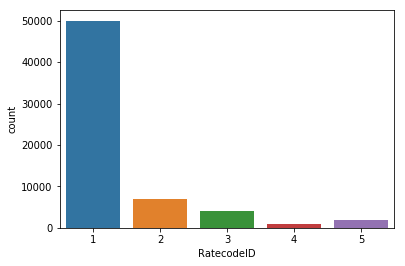

In [28]:
sns.countplot(test["RatecodeID"])

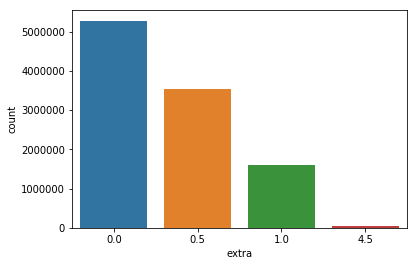

In [29]:
sns.countplot(df["extra"])

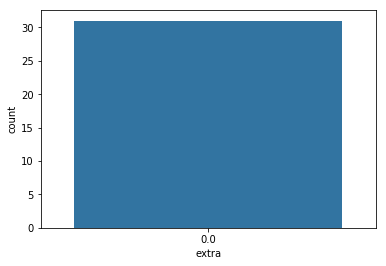

In [30]:
sns.countplot(df[df.RatecodeID == 6].extra)

## Notes 

* *improvement_surgcharge* should be constant. Minimum seems to be a sign error. Maximum seems to be a outlier (mistake??)


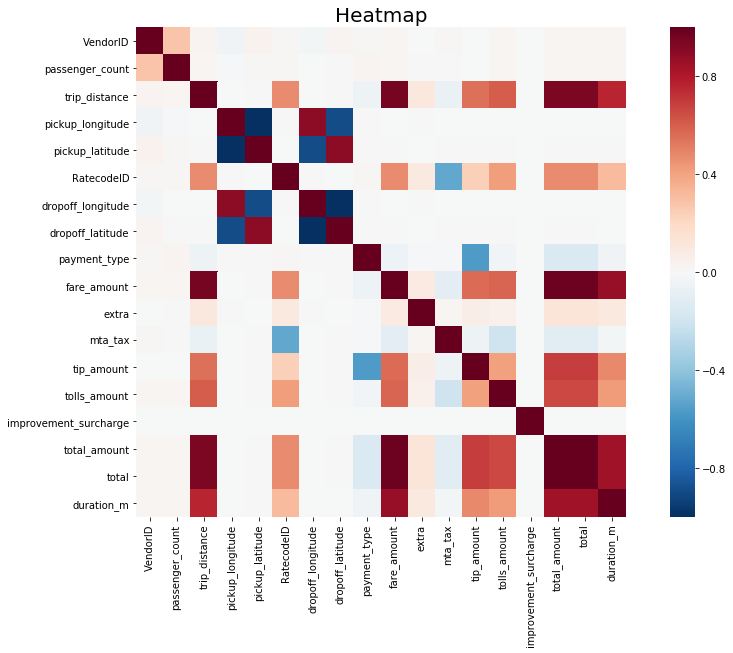

In [44]:
# Calculate correlations of all 3 datasets
corr = df.corr()

plt.figure(figsize=(16,9))

plt.title("Heatmap",fontsize=20)
sns.heatmap(corr, cmap="RdBu_r", square=True)

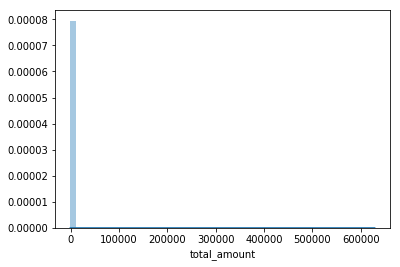

In [32]:
sns.distplot(data['total_amount'], hist=True)

In [40]:
sample = df.sample(10000)

In [136]:
sns.lmplot(x='extra',y='Overnight',hue='RushHour',data=sample)

KeyError: "['Overnight' 'RushHour'] not in index"

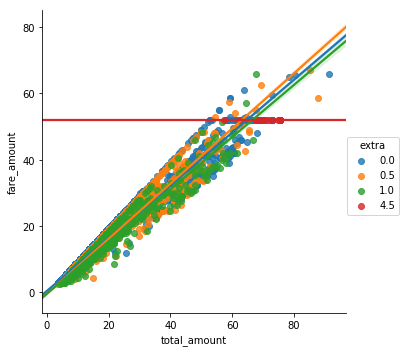

In [41]:
sns.lmplot(x='total_amount',y='fare_amount',hue='extra',data=sample)

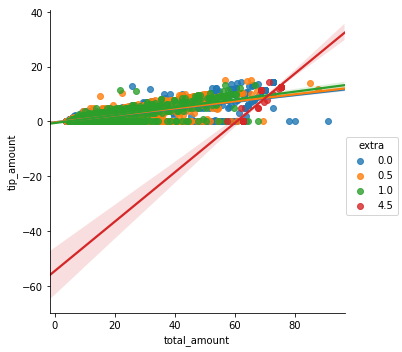

In [42]:
sns.lmplot(x='total_amount',y='tip_amount',hue='extra',data=sample)

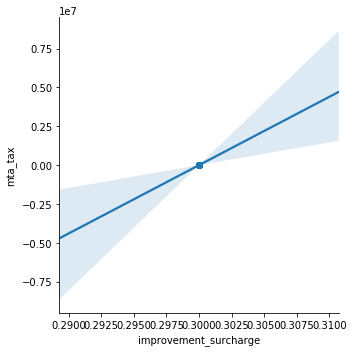

In [43]:
sns.lmplot(x='improvement_surcharge',y='mta_tax',data=sample)